In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.preprocessing import binarize
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV

# A sound object
def sound():
    os.system('E:/Downloads/DATA/Sosumi.aiff')

%matplotlib inline
sns.set_context('notebook')

#path = 'Z:/largetransfer/luc/carter'

In [3]:
data=pd.read_csv('Z:/largetransfer/luc/carter/data/model_data/tci_final1_10_10_2016.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
data1=pd.read_csv('Z:/largetransfer/luc/carter/data/clean_data/tci_1_0.csv',parse_dates=[1])

C:\Users\senatoduro8\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
def parsePin(x):
    x=str(x)
    return x[:3]+'-'+x[3:5]+'-'+x[5:]
data1['PIN']=data1.PIN.apply(parsePin)

In [164]:
#subsetting data via nluc variable + attaching 'Survey grade' variable
ndata=pd.merge(data,data1[['PIN','Survey Grade']],left_on ='parcel', right_on='PIN',how ='left')
ndata['Survey Grade'].fillna('No Grade', inplace=True)
ndata=ndata.loc[(ndata.nluc==5100.0) | (ndata.nluc==5200.0) | (ndata.nluc==5300.0),]

In [165]:
##subsetting residential data via plcass variable
ndata=ndata.ix[ndata.pclass=='Residential',]
ndata.drop('pclass',inplace=True,axis=1)
ndata.rename(columns={'Survey Grade':'survey_grade'})

,parcel,vacant,rnumstor,propsize,totusabl,tmktval,condition_value14,ownerocc_value,totbldgs,yrbuilt_filtered,...,t_days,t_shf_deed,t_num,al_num,al_days,price_per_sqft,nluc,NAME10,PIN,survey_grade
0,001-01-001,0,1.0,32768,4149.0,445500.0,5.0,1,1,1951,...,3508,3543,0.000000,0.000000,3508,107.375271,5100.0,1011.02,001-01-001,A
1,001-01-003,0,1.5,81536,15828.0,1159600.0,8.0,1,1,1962,...,3508,3543,0.104048,0.000000,3508,73.262573,5100.0,1011.02,001-01-003,A
2,001-01-004,0,1.5,13832,2537.0,266300.0,6.0,1,1,1957,...,3508,3543,0.104048,0.104048,3077,104.966496,5100.0,1011.02,001-01-004,A
3,001-01-005,0,1.5,10500,1578.0,171700.0,6.0,1,1,1953,...,3508,3543,0.208096,0.104048,187,108.808619,5100.0,1011.02,001-01-005,B
4,001-01-006,0,2.0,16500,3650.0,296200.0,8.0,1,1,1928,...,3508,3543,0.000000,0.000000,3508,81.150685,5100.0,1011.02,001-01-006,A
5,001-01-007,0,2.0,12000,3300.0,324900.0,7.0,1,1,1927,...,3508,3543,0.104048,0.000000,3508,98.454545,5100.0,1011.02,001-01-007,A
6,001-01-008,0,1.5,12000,2160.0,350500.0,7.0,1,1,1961,...,3508,3543,0.000000,0.000000,3508,162.268519,5100.0,1011.02,001-01-008,A
7,001-01-009,0,2.0,11250,3590.0,365000.0,6.0,1,1,1928,...,3508,3543,0.416192,0.208096,420,101.671309,5100.0,1011.02,001-01-009,A
8,001-01-010,0,3.0,11250,2576.0,274900.0,6.0,1,1,1928,...,3508,3543,0.104048,0.000000,3508,106.715839,5100.0,1011.02,001-01-010,A
9,001-01-011,0,1.5,11250,1652.0,179200.0,7.0,1,1,1950,...,3508,3543,0.104048,0.104048,1335,108.474576,5100.0,1011.02,001-01-011,A


In [167]:
condition_value = {0.0:'Unsound', 1.:'Sound', 2.:'Very poor', 3.:'Poor', 4.:'Fair', 5.:'Average', \
                   6.:'Good', 7.:'Very good', 8.:'Excellent'}
ndata['conditions']=ndata.condition_value14.map(condition_value)
ndata.conditions.fillna('Average',inplace=True)
ndata.drop('condition_value14',inplace=True, axis=1)
ndata.conditions.str.lower()

In [168]:
Good=['very good','excellent','good']
average=['fair','average','sound value']
poor=['unsound','poor','very poor']

def parseC(x):
    if x.lower() in Good:
        return 'good'
    elif x.lower() in average:
        return 'average'
    else: return 'poor'
ndata['condition']=ndata.conditions.apply(parseC)
ndata.drop('conditions',axis=1,inplace=True)
ndata.drop('PIN', axis=1, inplace=True)

In [169]:
ndata.reset_index(inplace=True)
cond_dummy= pd.get_dummies(ndata.condition) 
cond_dummy['parcel']=ndata.parcel
ndata= pd.merge(ndata, cond_dummy,left_on='parcel', right_on= 'parcel',how='left')
ndata.set_index('parcel', inplace=True)
ndata.drop('index', axis=1, inplace = True)

In [170]:
#Removing certain features from the data set
t = list(ndata.columns)
for i in ['vacant_block'\
          'part_one_crimes','part_two_crimes',
          'white','asian','other','hispanic','young','middle','old','nluc','vacant',\
        ]:
    if i in t:
        t.remove(i)
    
features = t


In [171]:
X_train,X_test,y_train,y_test=train_test_split(ndata[features],ndata["vacant"],test_size=0.2,random_state=7)

In [172]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(88503, 49)
(22126, 49)
(88503,)
(22126,)


In [174]:
X_train1=X_train.drop(['Survey Grade', 'condition','NAME10'],axis=1)
X_test1=X_testr=X_test.drop(['Survey Grade', 'condition','NAME10'],axis=1)

#  Building models


## Random Forest

In [208]:

from scipy.stats import randint as sp_randint
from sklearn.externals import joblib
from time import time

n_trees=list(range(40,81))
n_features=list(range(20,31))

# param_grid=dict(n_estimators=n_trees,max_features=n_features)
start_time=time()

param_dist=dict(n_estimators=sp_randint(50,81),max_features=sp_randint(20,31))
    
rfc=RandomForestClassifier(class_weight={0:1,1:10},random_state=6)
# grid_rfc=GridSearchCV(rfc,param_grid,cv=10,scoring="accuracy") 
rand_rfc=RandomizedSearchCV(rfc, param_dist,cv=10,scoring="accuracy",n_iter=10)

# grid_rfc.fit(X_train,y_train)
rand_rfc.fit(X_train1,y_train)

joblib.dump(rand_rfc, "Z:/largetransfer/luc/carter/models10_11_2016/rand_rfc1.pkl")

end_time=time()-start_time
sound()

In [209]:
from scipy.stats import randint as sp_randint
from time import time
from itertools import islice,count
from sklearn.externals import joblib

start=time()

param_dist=dict(n_estimators= sp_randint(200,250),\
                max_features= sp_randint(20,30),\
                max_depth= sp_randint(2,10),\
               learning_rate =list(islice(count(0.01,0.01),0,10)))
         
gbm=GradientBoostingClassifier(random_state=10)

rand_gbm=RandomizedSearchCV(gbm,param_dist,cv=10,scoring='accuracy',n_iter=5)

rand_gbm.fit(X_train1,y_train)

joblib.dump(rand_gbm,"Z:/largetransfer/luc/carter/models10_11_2016/rand_gbm1.pkl")

end_time=time()-start
sound()

In [211]:
from sklearn.preprocessing import StandardScaler
from time import time
from sklearn.externals import joblib
start_time=time()
# Scaling features

X_train1=StandardScaler().fit_transform(X_train1)
X_test1=StandardScaler().fit_transform(X_test1)

# Parameter options using the l1 penalty
grid_param1={'penalty':['l2'],\
           'solver':['newton-cg'],\
           'C':[ 0.001,0.01, 0.1, 1, 10,100,1000]}

log_reg1=LogisticRegression(tol=0.0001, max_iter=300,class_weight={0:1,1:10})

# Creating gridsearch obj using the above setings
grid_reg1=GridSearchCV(log_reg1,grid_param1,cv=10,scoring='accuracy',error_score=0)

grid_reg1.fit(X_train1,y_train)

joblib.dump(grid_reg1,'Z:/largetransfer/luc/carter/models10_11_2016/logistic_reg.pkl')

total_time=time()-start_time

sound()


### Making predictions

In [20]:
from sklearn.externals import joblib
logistic=joblib.load('Z:/largetransfer/luc/carter/models10_11_2016/logistic_reg.pkl')
gradientB=joblib.load('Z:/largetransfer/luc/carter/models10_11_2016/rand_gbm1.pkl')
RandomF=joblib.load("Z:/largetransfer/luc/carter/models10_11_2016/rand_rfc1.pkl")

### Logistic

In [21]:
#Best model after the Randomized search
logistic.best_estimator_

LogisticRegression(C=0.001, class_weight={0: 1, 1: 10}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=300,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [22]:
#Checking the parameters used for the model selection
logistic.best_params_

{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}

In [175]:
#predicted values
from sklearn.preprocessing import StandardScaler
X_testlg=StandardScaler().fit_transform(X_testr)
predicted=logistic.predict(X_testlg)


In [176]:
#Measuring model accuracy
metrics.accuracy_score(y_test,predicted)

0.87060471843080534

In [177]:
metrics.confusion_matrix(y_test,predicted)

array([[17791,  2439],
       [  424,  1472]])

In [178]:
pd.crosstab(y_test,predicted, margins=True,colnames=['predicted'],rownames=['Actual'])

predicted,0,1,All
Actual,,,
0,17791,2439,20230
1,424,1472,1896
All,18215,3911,22126


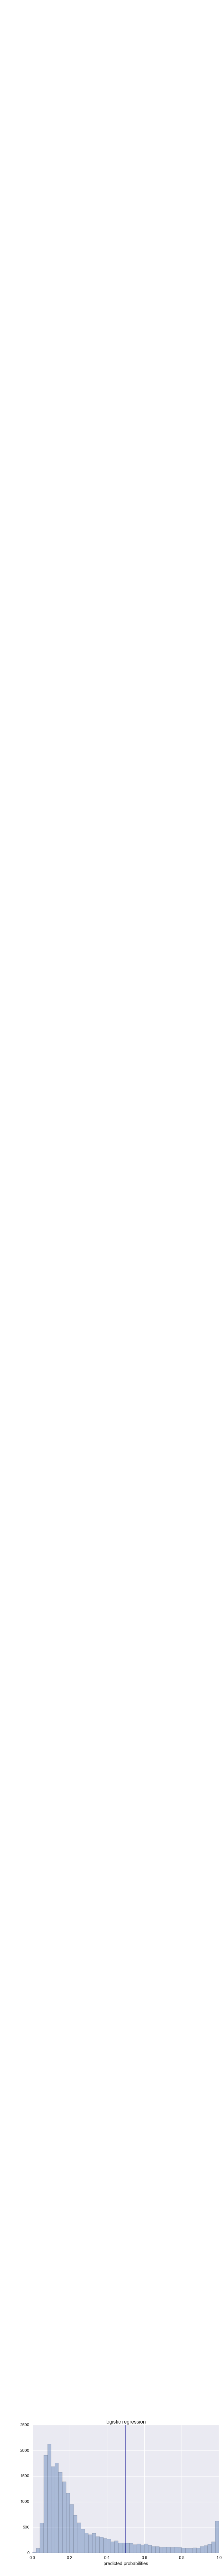

In [179]:
# Visualizing the distribution of the  predicted probabilities
# sns.set_style('white')

predprob=logistic.predict_proba(X_testlg)[:,1]

def distprob(predprob,threshold,model='',adjusted=False):
    """Utility for plotting the distribution probability"""
    
    sns.distplot(predprob,kde=False)
    plt.axvline(threshold,color='DarkBlue', alpha=0.5)
    plt.xlabel('predicted probabilities')
    ax=plt.gca()
    ax.annotate('Decision boundary', xy=(threshold,7500), xytext=(threshold+0.2,8000),
                arrowprops=dict(facecolor='black', shrink=0.08),
                )
    if adjusted:
        plt.title(model +' with adjusted threshold:%.2f'%threshold)
    else:
        plt.title(model)


    
distprob(predprob,0.5,'logistic regression')

In [181]:
dsource=pd.read_excel('Z:/largetransfer/luc/carter/data/model_data/model_variables_and_sources.xlsx')
dsource=dsource.rename(columns={'Variable names':'variables'})
dsource['source']=dsource.source.str.lower()
dsource['variables']=dsource.variables.str.lower()
dsource

In [182]:
#Coefficients of the model
coef=logistic.best_estimator_.coef_.T[:46].ravel()
# coef=logistic.best_estimator_.coef_.T.ravel()
var=X_train1.columns.values[:46]
df=pd.DataFrame(dict(list(zip(['variables','coef'],[var,coef]))))
df['variables']=df.variables.str.lower()
df=pd.merge(df,dsource[['variables','source']],on='variables',how='left')
df.loc[df.variables=='bachelors.','source']='demographics'
df.loc[df.variables=='v_total_2yr','source']='violations'
df.loc[df.variables=='c_ovv_board_num','source']='complaints'
df.loc[df.variables== 'c_ovv_num','source']='complaints'
df.loc[df.variables=='fc_days','source']='foreclosure'
# df.iloc[df.shape[0]-4:,'source']='condition'
df=df.fillna('condition',axis=1)
df['source']=df.source.str.replace('_',' ')
df['source']=df.source.str.capitalize()
    
sources=set(df.source)
for s in sources:
    l=df.ix[df.source==s,].shape[0]
    idx=df.ix[df.source==s,].index.values
    if l != 1:
        for i in range(l):
            df.loc[df.index==idx[i],'source']= s + str(i)


In [183]:
df

,coef,variables,source
0,0.015323,rnumstor,Residential
1,-0.014865,propsize,Main property0
2,0.015686,totusabl,Main property1
3,-0.121078,tmktval,Main property2
4,-0.132076,ownerocc_value,Main property3
5,0.007747,totbldgs,Main property4
6,-0.112659,yrbuilt_filtered,Main property5
7,0.064575,vacant_block,Demograhics0
8,-0.032700,median_rent,Demograhics1
9,0.018231,property_crimes,Demograhics2


In [37]:
# Tuning the prediction probabilities and setting roc_curve
adjusted_prediction=np.where(predprob>0.2,1,0)

In [38]:
pd.crosstab(y_test,adjusted_prediction,colnames=['predicted'],rownames=['Actual'])

predicted,0,1
Actual,,
0,12145,8085
1,135,1761


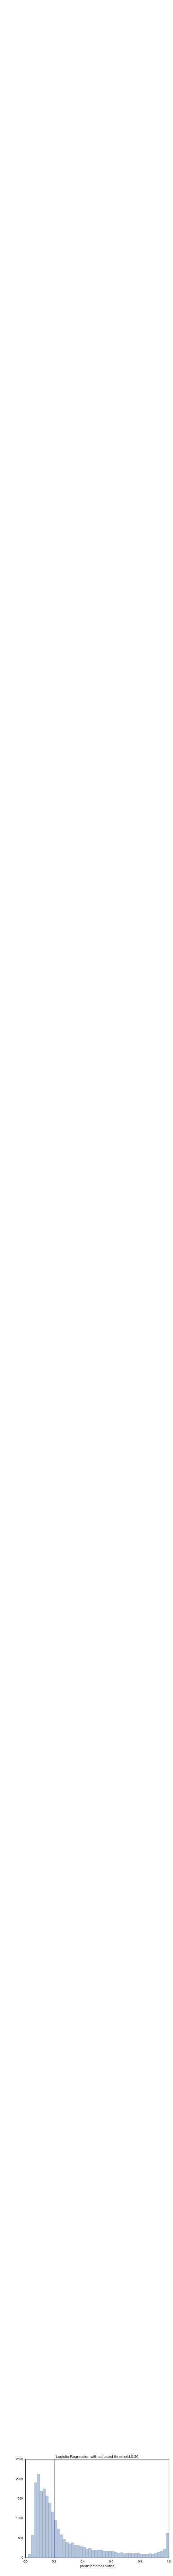

In [39]:
#adjusting the decision line to 0.2
distprob(predprob,0.2,adjusted=True, model='Logistic Regression')

### Random Forest

In [184]:
features=df.source

In [185]:
RandomF.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 10},
            criterion='gini', max_depth=None, max_features=20,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=69, n_jobs=1,
            oob_score=False, random_state=6, verbose=0, warm_start=False)

In [159]:
important_features=RandomF.best_estimator_.feature_importances_
feature_map=dict(zip(['features','values'],[features,important_features]))
pd.DataFrame(feature_map).head()

,features,values
0,Residential,0.005027
1,Main property0,0.026123
2,Main property1,0.028084
3,Main property2,0.028552
4,Main property3,0.004510


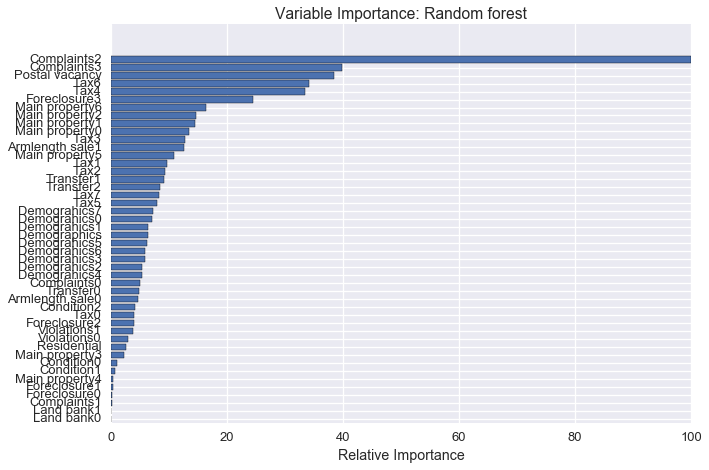

In [186]:
#variable importance plotting utility


def important_feature_plot(variables,values,model=''):
    # Plot feature importance
    sns.set_context('talk')

    # make importances relative to max importance
    features1=np.array(variables)
    feature_importance = 100.0 * (values / values.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
#     plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos,features1[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance: '+ model)
    plt.show()
    
# feature_lab=['Residential 1','Main property 1','Main property 1','Main property 2','Main property 3','Main property 4'\
#             ,'Main property 5','Demographics','Land & Banks 1','Land & Banks 2','Tax 1','Tax 2','Tax 3','Tax 4','Tax 5','Tax 6'\
#             ,'Tax 7','Tax 8','Postal vacancy','Violations 1','Violations 2','Complaints 1','Complaints 2','Complaints 3','Complaints 4',\
#             'Foreclosure 1','Foreclosure 2','Foreclosure 3','Foreclosure 4','Transfer 1','Transfer 2','Transfer 3','Armslength 1','Armslength 2',\
#             'Tax 9']

important_feature_plot(features,important_features,'Random forest')

In [187]:
#Making a prediction
predicted_rf=RandomF.predict(X_test1)
pd.crosstab(y_test,predicted_rf,colnames=['predicted'],rownames=['Actual'])

predicted,0,1
Actual,,
0,20006,224
1,1007,889


In [50]:
print('Calculated score: %.5f \n RandomizedScore: %.5f'%(metrics.accuracy_score(y_test,predicted_rf),RandomF.best_score_))

Calculated score: 0.94436 
 RandomizedScore: 0.94106


In [52]:
#prediction probability
# prob_rf=RandomF.predict_proba(X_test1)[:,1]
# plt.subplot(211)
# distprob(prob_rf,0.5,model='Random Forest')
# plt.subplot(212)
# distprob(prob_rf,0.2,model='Random Forest', adjusted=True)

In [ ]:
#prediction probability
prob_rf=RandomF.predict_proba(X_test)[:,1]

distprob(prob_rf,0.5,model='Random Forest')


In [ ]:
#prediction probability
prob_rf=RandomF.predict_proba(X_test)[:,1]
distprob(prob_rf,0.2,model='Random Forest', adjusted=True)

In [ ]:

#Adjusting the thresholds and setting the roc curves
newpred_rf=np.where(prob_rf>0.2,1,0)

pd.crosstab(y_test,newpred_rf,colnames=['predicted'],rownames=['Actual'])

### Gradient Boosting


In [53]:
#checking the best estimator obtained from the Randomized grid parameter search
gradientB.best_estimator_

GradientBoostingClassifier(init=None, learning_rate=0.05, loss='deviance',
              max_depth=3, max_features=29, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=220,
              presort='auto', random_state=10, subsample=1.0, verbose=0,
              warm_start=False)

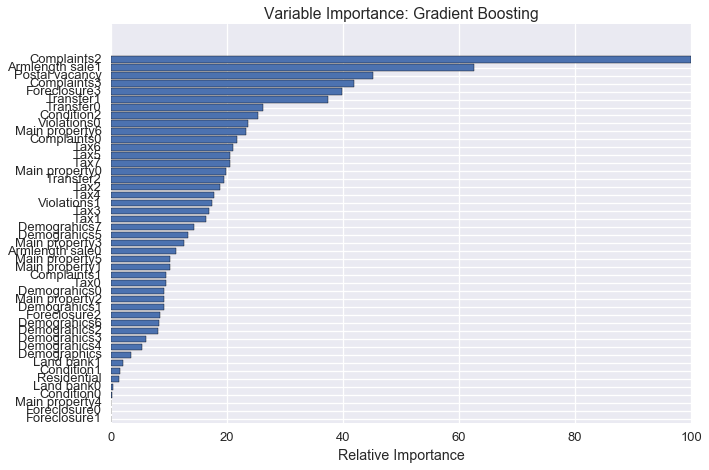

In [188]:
important_feat=gradientB.best_estimator_.feature_importances_

important_feature_plot(features,important_feat,'Gradient Boosting')

In [57]:
predictedgb=gradientB.predict(X_test1)

In [58]:
pd.crosstab(y_test,predictedgb,colnames=['predicted'],rownames=['Actual'])

predicted,0,1
Actual,,
0,19974,256
1,929,967


In [59]:
#Accuracy score
metrics.accuracy_score(y_test,predictedgb)

0.9464430986170117

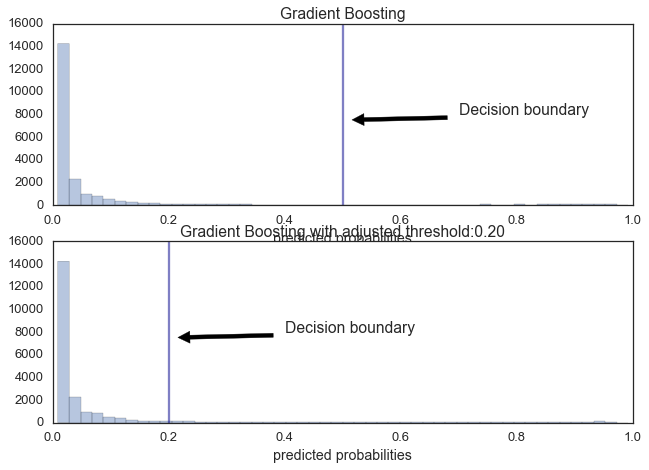

In [61]:
# prob_gbm=gradientB.predict_proba(X_test1)[:,1]
# plt.subplot(211)
# distprob(prob_gbm,0.5,model='Gradient Boosting')
# plt.subplot(212)
# distprob(prob_gbm,0.2,model='Gradient Boosting', adjusted=True)

In [ ]:
prob_gbm=gradientB.predict_proba(X_test)[:,1]

distprob(prob_gbm,0.5,model='Gradient Boosting')


In [ ]:
prob_gbm=gradientB.predict_proba(X_test)[:,1]

distprob(prob_gbm,0.2,model='Gradient Boosting', adjusted=True)

In [ ]:
adjustpredgb=np.where(prob_gbm>0.2,1,0)
pd.crosstab(y_test,adjustpredgb,colnames=['Predicted'],rownames=['Actual'])

### ROC Curve

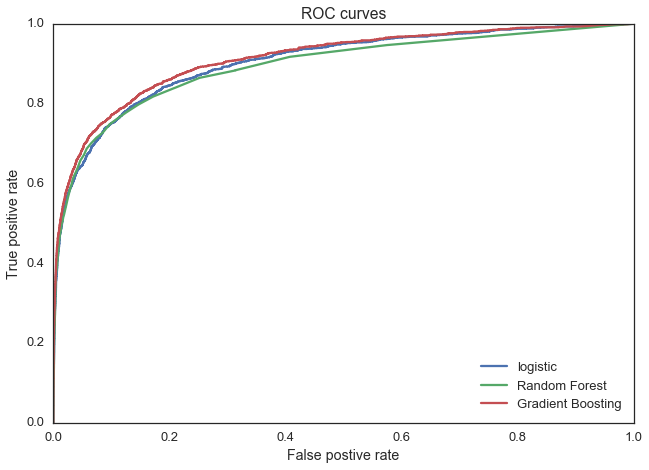

In [62]:
def roc_curve(actual,score,model=''):
    fpr,tpr,thresholds=metrics.roc_curve(actual,score)
    plt.plot(fpr,tpr,label=model)
    plt.title('ROC curves')
    plt.xlabel('False postive rate')
    plt.ylabel('True positive rate')
    
roc_curve(y_test,predprob,'logistic')
plt.hold('on')
roc_curve(y_test,prob_rf,'Random Forest')
plt.hold('on')
roc_curve(y_test,prob_gbm,'Gradient Boosting')
plt.hold('off')
plt.legend(loc='lower right')

### Specificity and sensitivity of models

In [63]:

model_predictions=[predicted,predicted_rf,predictedgb]
print('Summary of model performance')
for i,pred in enumerate(model_predictions):
    if i == 1:
        print("For Logistic model")
    elif i == 2:
        print('For random forest')
    else:
        print('for gradient boosting')
        
    print(metrics.classification_report(y_test,pred))
    print('\n')

Summary of model performance
for gradient boosting
             precision    recall  f1-score   support

          0       0.98      0.88      0.93     20230
          1       0.38      0.78      0.51      1896

avg / total       0.93      0.87      0.89     22126



For Logistic model
             precision    recall  f1-score   support

          0       0.95      0.99      0.97     20230
          1       0.80      0.47      0.59      1896

avg / total       0.94      0.94      0.94     22126



For random forest
             precision    recall  f1-score   support

          0       0.96      0.99      0.97     20230
          1       0.79      0.51      0.62      1896

avg / total       0.94      0.95      0.94     22126





In [65]:
results=pd.DataFrame({'Logistic':predicted,'Random_forest':predicted_rf,'Gradient_Boosting':predictedgb})
# results.to_csv('C:\\Users\\senatoduro8\\Poverty_center\\Predictions.csv')
results.to_csv('Z:/largetransfer/luc/carter/data/predictions/Predictions_10_14_2016.csv')

### Files for buffering

In [66]:

predictions=pd.read_csv('Z:/largetransfer/luc/carter/data/predictions/Predictions_10_14_2016.csv')

In [84]:
X_test.reset_index(inplace=True)

In [91]:
# data=pd.merge(pd.DataFrame(y_test).reset_index(),predictions,right_index=True,left_index=True,how='inner').drop('Unnamed: 0',axis=1)
df=pd.merge(data,X_test[['parcel','NAME10','Survey Grade']],left_on='parcel',right_on='parcel',how='outer').rename(columns={'NAME10':'census_track'})


In [92]:
df.to_csv('Z:/largetransfer/luc/carter/data/predictions/predictions_10_14_2016.csv')